# Expectation–Maximization Algorithm

## Introduction

Suppose we observe data $\mathcal{X}$ generated from a model $p$ with parameters $\theta$. We would like to estimate the parameter by maximizing log likelihood:
$$
\hat{\theta} = \underset{\theta}{\operatorname{argmax}}log(p(\mathcal{X} | \theta))
$$
Suppose we have hidden variables $Z$, then 
$$
p(\mathcal{X} | \theta) = \sum_z p(\mathcal{X},z | \theta)
$$

Note that this likelihood in general is non-convex with many local maxima. However, if we can observe $\mathcal{X}$ and $Z$, and $p(x_n,z_n|\theta)$ is a exponential distribution like Gaussian, by taking the log, we can get a convex log-likelihood function. The optimization will be much easier. 

Expectation Maximization is ...

## A Lower Bound of the Log-Likelihood

Suppose we have a distribution of $z$ as $q(z)$. Then we define $L(q, \theta)$ as below

$$
\begin{align}
L(q, \theta)  =& q(z)\sum_z log(\frac{p(X,z | \theta)}{q(z)}) \\
=& \sum_z q(z)log(p(X,z | \theta)) -  \sum_z q(z)log(q(z)) \\
=& E_{q(z)}(log(p(X,Z | \theta))) + H(q)
\end{align}
$$

Then we calculate the KL divergence between $q(z)$ and $p(Z|X,\theta)$,

$$
\begin{align}
D_{KL}(q, p(Z|X, \theta)) =& H(q, p(Z|X, \theta) - H(q) \\
=& E_q[-log(\frac{p(X,Z | \theta)}{P(X | \theta)}] - H(q) \\
=& -E_q[log(p(X,Z | \theta)] + E_q[log(P(X | \theta)] - H(q) \\
=&l(\theta | X) - L(q, \theta)
\end{align}
$$

**Because $D_{KL}(q, p(Z|X, \theta)) \geq 0$, then we can get a lower bound of $l(\theta|X)$ which is $L(q, \theta)$.**

If we want to maximize the lower bound $L(q, \theta)$, we need to set $D_{KL}(q, p(Z|X, \theta)) = 0$. Then we pick $q(z)$ as:
$$
q_{\theta}(z) = P(Z | X, \theta)
$$

## Expectation-Maximization Algorithm

Expectation-Maximization is an iterative process like below. We first get the expectation with respect to $q_{\theta_{t}}(z)$, then maximize it with respect to $\theta$.

>$$
\theta_{t+1} = \underset{\theta}{\operatorname{argmax}}E_{q_{\theta_{t}}(z)}[log(p(X, Z|\theta))]
$$

In some literatures, it is broken down into two parts:
> 1. **Find the expectation** $E_{q_{\theta_{t}}(z)}[log(p(X, Z|\theta))$ where $q_{\theta_t} = \underset{q_v}{\operatorname{argmax}}L(q_v, \theta_t)$. This is solved by minimizing the KL divergence $D_{KL}(q, p(Z|X, \theta))$ and we get $q_{\theta_t}(z) = P(Z | X, \theta_t)$

> 2. **Solve the maximization** $\underset{\theta}{\operatorname{argmax}}E_{q_{\theta_{t}}(z)}[log(p(X, Z|\theta))]$

**!!! Note !!!: To make EM work, there are two requirements**
> 1. Hidden posterior $p(Z|X,\theta)$ is tractable so that we can easily get expectation with respect to $q_{\theta_t}(z) = P(Z | X, \theta_t)$.

> 2. $p(Z, X|\theta)$ is a exponential distribution and log-likelihood function is convex.  

## Proof of Convergence

$$
\begin{align}
l(X|\theta_t) =& L(q_{\theta_t}, \theta_t) \text{   when $D_{KL}(q, p(Z|X, \theta)) = 0$ }\\ 
\leq & L(q_{\theta_t}, \theta_{t+1}) \\
\leq & l(q_{\theta_{t+1}}, \theta_{t+1})
\end{align}
$$

## Examples

### Coin Flip

Karl Rosaen's [blog post](http://karlrosaen.com/ml/notebooks/em-coin-flips/) has a very intuitive way to explain how EM works for a coin flip experiment. Here we will be more strictly following pure math. 

Suppose we have two coins with different heads probability $\theta_A$ and $\theta_B$ and they are unknown to us. We collect data from a series of $N$ trials to estimate the bias of each coin. Each trial $k$ consists of flipping the same random coin $Z_k$ a total of $M$ times and recording only the total number $X_k$ of heads.

Mathematically, 

$$
\theta = (\theta_A, \theta_B) \\
Z_k \sim Uniform(A, B) \\
P(X_k | Z_k, \theta) \sim B(M, \theta_{Z_k})
$$

When we want to tackle a problem using EM, we need first think about two probability distribution, $p(Z | X, \theta)$ and $p(Z, X | \theta)$.

**1. For $p(Z, X |\theta)$:**

$$
p(Z, X |\theta) = p(X|Z,\theta) p(Z|\theta) = p(X|Z,\theta) p(Z)
$$

Then we can get:
$$
\begin{align}
p(Z=A, X=X_k |\theta) =& p(X=X_k|Z=A,\theta) p(Z=A) \\ 
=& \frac{1}{2}\begin{pmatrix}M\\X_k\end{pmatrix}\theta_A^{X_k}(1-\theta_A)^{M-X_k} 
\\ 
p(Z=B, X=X_k |\theta) =& p(X=X_k|Z=B,\theta) p(Z=B) \\ 
=& \frac{1}{2}\begin{pmatrix}M\\X_k\end{pmatrix}\theta_B^{X_k}(1-\theta_B)^{M-X_k}
\end{align}
$$

**2. For $p(Z | X, \theta)$:**

$$
q_k(Z=A) =  p(Z = A | X=X_k, \theta) = \frac{P(Z=A|\theta) * P (X=X_k | Z=A, \theta)}{p(X=X_k|\theta)} \\
q_k(Z=B) =  p(Z = B | X=X_k, \theta) = \frac{P(Z=B|\theta) * P (X=X_k | Z=B, \theta)}{p(X=X_k|\theta)}
$$

Where $P(Z=A|\theta) = P(Z=B|\theta) = \frac{1}{2}$, 
$P (X=X_k | Z=A, \theta) = \begin{pmatrix}M\\X_k\end{pmatrix}\theta_A^{X_k}(1-\theta_A)^{M-X_k}$,
$P (X=X_k | Z=B, \theta) = \begin{pmatrix}M\\X_k\end{pmatrix}\theta_B^{X_k}(1-\theta_B)^{M-X_k}$



Next we will start to run EM algorithm iteratively:
>$$
\theta_{t+1} = \underset{\theta}{\operatorname{argmax}}E_{q_{\theta_{t}}(z)}[log(p(X, Z|\theta))]
$$

For a single trial, we get:

$$
\begin{align}
E_{q_{\theta_{t}}(z)}[log(p(X, Z|\theta))] =& q_k(Z=A)log(p(X=X_k, Z=A | \theta)) + q_k(Z=B) log(p(X=X_k, Z=B | \theta)) \\
\propto& q_k(Z=A)[X_klog(\theta_A)+(M-X_k)log(1-\theta_A)] + q_k(Z=B)[X_klog(\theta_B)+(M-X_k)log(1-\theta_B)]
\end{align}
$$

Since we have $N$ trials:

$$
\begin{align}
E_{q_{\theta_{t}}(z)}[log(p(X, Z|\theta))] =& E_{q_{\theta_t}}[log\prod_n^N{p(X=x_n, Z=z_n|\theta)}]\\
=& \sum_{n}^{N}E_{q_{\theta_t}}[log(p(X=x_n, Z=z_n|\theta)]
\end{align}
$$

To maximize $E_{q_{\theta_{t}}(z)}[log(p(X, Z|\theta))]$, we will take the derivative with respect to $\theta_A$ and $\theta_B$, and set them to be $0$.

$$
\theta_A = \frac{\sum_n^N{a_n x_n}}{\sum_n^N{a_n M}} \\
\theta_B = \frac{\sum_n^N{b_n x_n}}{\sum_n^N{b_n M}}
$$
where $a_n = q_n(Z=A)$, $b_n = q_n(Z=B)$, $a_n+b_n=1$

GT theta_A: 0.1, GT theta_B: 0.7
iter: 0, theta_A: 0.60, theta_B: 0.70, expectation: -7341.69
iter: 1, theta_A: 0.21, theta_B: 0.71, expectation: -5009.99
iter: 2, theta_A: 0.10, theta_B: 0.70, expectation: -4790.09
It converged...
t_A: 0.10, t_B: 0.70


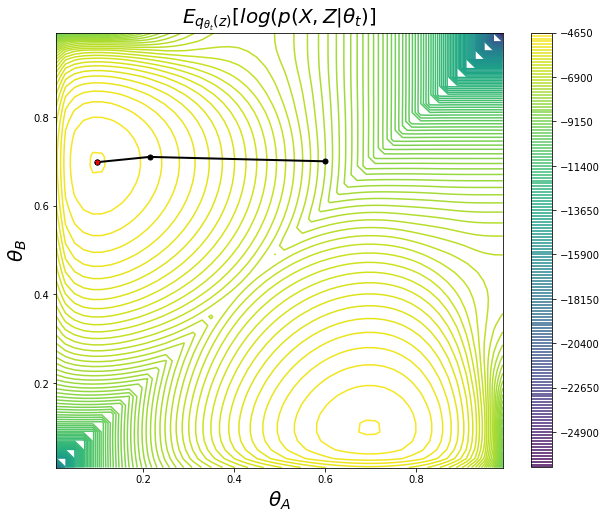

In [150]:
# Coin flip experiment

%matplotlib inline
import numpy as np
import scipy.misc as misc
from matplotlib import pyplot as plt

def get_qn(theta_A, theta_B, M, nheads):
    #unnormalized_an = theta_A ** nheads * (1-theta_A) ** (M-nheads)
    #unnormalized_bn = theta_B ** nheads * (1-theta_B) ** (M-nheads)
    #an = unnormalized_an / (unnormalized_an + unnormalized_bn)
    #bn = 1-an
    log_an = nheads*np.log(theta_A) + (M-nheads)*np.log(1-theta_A)
    log_bn = nheads*np.log(theta_B) + (M-nheads)*np.log(1-theta_B)
    t = np.exp(log_an - log_bn)
    # an / bn = t, an + bn = 1
    # t*bn + bn = 1 => bn = 1 / (t+1)
    bn = 1.0 / (t+1) 
    an = t / (t+1)
    return an, bn

def get_expectation(theta_A, theta_B, M, nheads, an, bn):
    l_a = nheads*np.log(theta_A) + (M-nheads)*np.log(1-theta_A) # + log(misc.comb(M, nheads))
    l_b = nheads*np.log(theta_B) + (M-nheads)*np.log(1-theta_B) # + log(misc.comb(M, nheads))
    return an * l_a + bn * l_b

def coin_em(rolls, theta_A=np.random.rand(), theta_B=np.random.rand(), maxiter=10):
    theta_As = [theta_A] 
    theta_Bs = [theta_B]
    expectations = []
    for i in range(maxiter+1):
        numerator = [0,0]
        denominator = [0,0]
        expectation = 0
        for roll in rolls: 
            M = len(roll)
            nheads = roll.count("H")
            an, bn = get_qn(theta_A, theta_B, M, nheads)
            numerator[0] += an*nheads
            denominator[0] += an*M
            numerator[1] += bn*nheads
            denominator[1] += bn*M  
            expectation += get_expectation(theta_A, theta_B, M, nheads, an, bn)
        theta_A = numerator[0] / denominator[0]
        theta_B = numerator[1] / denominator[1] 
        theta_As.append(theta_A)
        theta_Bs.append(theta_B)
        expectations.append(expectation) # This is the expectation for last theta_A and theta_B
        if len(expectations) >= 2 and np.abs(expectations[-2] - expectations[-1]) < 1E-8:
            print('It converged...')
            return theta_As[:-1], theta_Bs[:-1]
        print(f'iter: {i}, theta_A: {theta_As[-2]:.2f}, theta_B: {theta_Bs[-2]:.2f}, expectation: {expectation:.2f}')
    return theta_As[:-1], theta_Bs[:-1] 
        

def plot_coin_likelihood(rolls, thetas_A, thetas_B):
    xvals = np.linspace(0.01,0.99,50)
    yvals = np.linspace(0.01,0.99,50)
    
    Z = np.zeros((len(xvals), len(yvals)))
    for i,x in enumerate(xvals):
        for j,y in enumerate(yvals):
            theta_A = x
            theta_B = y
            expectation = 0
            for roll in rolls: 
                M = len(roll)
                nheads = roll.count("H")
                an, bn = get_qn(theta_A, theta_B, M, nheads)
                expectation += get_expectation(theta_A, theta_B, M, nheads, an, bn)
            Z[i][j] = expectation
        
    plt.figure(figsize=(10,8))
    C = plt.contour(xvals,yvals,Z,150)
    cbar = plt.colorbar(C)
    plt.title(r"$E_{q_{\theta_{t}}(z)}[log(p(X, Z|\theta_t)]$", fontsize=20)
    plt.xlabel(r"$\theta_A$", fontsize=20)
    plt.ylabel(r"$\theta_B$", fontsize=20)
    
    plt.plot(thetas_A, thetas_B, '-k', lw=2.0)
    plt.plot(thetas_A, thetas_B, 'ok', ms=5.0)
    plt.plot(thetas_A[-1], thetas_B[-1], '*r', ms=5.0)

theta_A = 0.1
theta_B = 0.7
print(f'GT theta_A: {theta_A}, GT theta_B: {theta_B}')
N = 100
M = 100
rolls = []
selections = []
for n in range(N):
    p = np.random.uniform()
    if p < 0.5:
        theta = theta_A
        selections.append('A')
    else:
        theta = theta_B
        selections.append('B')
    roll = ""
    for m in range(M):
        p = np.random.uniform()
        if p < theta:
            roll+="H"
        else:
            roll+="T"
            print
    rolls.append(roll)

# print(selections)
# print(rolls)
t_As, t_Bs = coin_em(rolls, 0.6, 0.7, maxiter=6)
print(f't_A: {t_As[-1]:.2f}, t_B: {t_Bs[-1]:.2f}')

plot_coin_likelihood(rolls, t_As, t_Bs)
#

### Gaussian Mixture Model

A Gaussian mixture model can be defined as:

$$
p(x) \sim \sum_k^K\pi_k N(\mu_k, \Sigma_k)
$$

For using GMM for clustering, the full model can be defined as

$$
\theta = (\pi, \mu, \Sigma) \\
Z_k \sim Categorical(\pi) \\
p(X_k | Z_k, \theta) \sim N(\mu_{z_k}, \sigma_{z_k})
$$

When we want to tackle a problem using EM, we need first think about two probability distribution, $p(Z | X, \theta)$ and $p(Z, X | \theta)$.

**1. For $p(Z, X |\theta)$:**

$$
\begin{align}
p(Z_k, X_k | \theta) =& p(X_k|Z_k,\theta) p(Z_k|\theta) \\
=& p(X_|Z_k,\theta) p(Z_k | \theta) \\
=& \pi_{Z_k}N(X_k | \mu_{Z_k}, \Sigma_{Z_k})
\end{align}
$$

**2. For $p(Z | X, \theta)$:**

$$
\begin{align}
p(Z_k | X_k, \theta) =& \frac{P(Z_k|\theta) * P (X_k | Z_k, \theta)}{p(X_k|\theta)} \\
&= \frac{\pi_{Z_k}N(X_k | \mu_{Z_k}, \Sigma_{Z_k})}{\sum_{Z_k}\pi_{Z_k}N(X_k | \mu_{Z_k}, \Sigma_{Z_k})}
\end{align}
$$



Next we will start to run EM algorithm iteratively:
>$$
\theta_{t+1} = \underset{\theta}{\operatorname{argmax}}E_{q_{\theta_{t}}(z)}[log(p(X, Z|\theta))]
$$

For a single iteration with $N$ data points, we get:
$$
\begin{align}
E_{q_{\theta_{t}}(z)}[log(p(X, Z|\theta))] =& \sum_n^N \sum_k^K p(z_n = k | x_n, \theta_t) log(\pi_kN(x_n | \mu_k, \Sigma_k)) \\
=& \sum_n^N \sum_k^K r_{nk} log(\pi_k) + \sum_n^N \sum_k^K r_{nk} log(N(x_n | \mu_k, \Sigma_k))
\end{align}
$$
where $r_{nk} = p(z_n = k | x_n, \theta_t)$

By maximizing $E_{q_{\theta_{t}}(z)}[log(p(X, Z|\theta))]$, we get 
$$
\pi_k = \frac{\sum_n^N r_{nk}}{N} \\
\mu_k = \frac{\sum_n^N r_{nk}x_n}{\sum_n^N r_{nk}} \\
\Sigma_k =\frac{\sum_n^N r_{nk}x_n x_n^T}{\sum_n^N r_{nk}} - \mu_k \mu_k^T
$$

iter: 0, expectation: -77706.39
iter: 1, expectation: -77706.39
It converged...


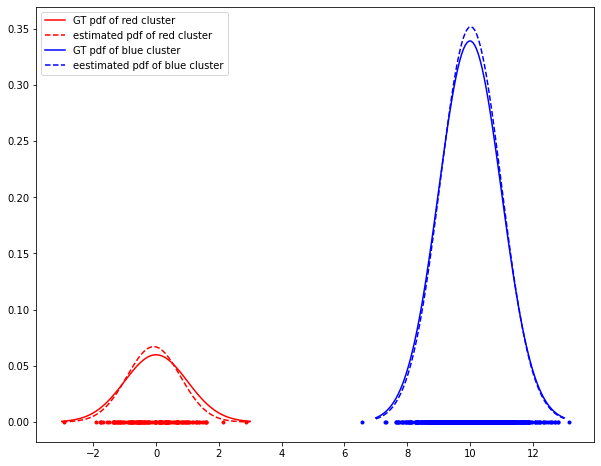

In [252]:
# GMM

%matplotlib inline
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
np.printoptions(precision=2)

pi_gt = [0.15, 0.85]
mu_gt= [0., 10.]
sigma_gt = [1., 1.]
assert(pi_gt[0] + pi_gt[1] == 1)
N = 1000
samples_A = []
samples_B = []
samples = []
for i in range(N):
    p = np.random.uniform()
    if p < pi_gt[0]:
        sample = np.random.normal(mu_gt[0], sigma_gt[0], 1)
        samples_A.append(sample)
    else:
        sample = np.random.normal(mu_gt[1], sigma_gt[1], 1)
        samples_B.append(sample)
    samples.append(sample)

pi = [0.4, 0.6]
mu = [2., 8.]
sigma = [1.6, 1.2]
assert(pi[0] + pi[1] == 1)
expectations = []

def get_rnk(sample, pi, mu, sigma):
    l = np.array([np.log(pi_) - 0.5 * (samples[n] - mu_)**2 / (sigma_**2) for pi_, mu_, sigma_ in zip(pi, mu, sigma)])
    # l -= np.min(l) # use min or max?
    l -= np.max(l)
    likelihood = np.exp(l)
    r_nk = np.squeeze(likelihood / np.sum(likelihood))
    return r_nk
    
for i in range(maxiter):
    new_pi = np.array([0., 0.])
    new_mu = np.array([0., 0.])
    new_sigma = np.array([0., 0.])
    expectation = 0
    for n in range(N):
        # likelihood = np.array([pi_ * stats.norm.pdf(samples[n], mu_, sigma_) for pi_, mu_, sigma_ in zip(pi, mu, sigma)])
        # r_nk_1 = np.squeeze(likelihood / np.sum(likelihood))
        # Solve numerical issue when likelihood is very very small.
        r_nk = get_rnk(samples[n], pi, mu, sigma)
        new_pi += r_nk
        new_mu += r_nk * samples[n]
        new_sigma += r_nk * samples[n] * r_nk * samples[n]
        expectation += np.sum(r_nk * np.log(likelihood))
    expectations.append(expectation)
    # print(f'iter: {i}, expectation: {expectation:.2f}, pi: {pi}, mu: {mu}, sigma: {sigma}')
    print(f'iter: {i}, expectation: {expectation:.2f}')
    if len(expectations) > 1 and np.abs(expectations[-2] - expectations[-1]) < 1E-8:
        print('It converged...')
        break
    rk = new_pi
    pi = rk / N
    mu = new_mu / rk
    sigma = new_sigma/rk - mu * mu
    
plt.figure(figsize=(10,8))
plt.plot(samples_A, np.zeros(len(samples_A)), '.r', lw=2.0)
x_range = np.linspace(mu_gt[0]-3*sigma_gt[0], mu_gt[0]+3*sigma_gt[0], 100)
plt.plot(x_range, pi_gt[0]*stats.norm.pdf(x_range, mu_gt[0], sigma_gt[0]), 'r', label='GT pdf of red cluster')
plt.plot(x_range, pi[0]*stats.norm.pdf(x_range, mu[0], sigma[0]), 'r--', label='estimated pdf of red cluster')

plt.plot(samples_B, np.zeros(len(samples_B)), '.b', lw=2.0)
x_range = np.linspace(mu_gt[1]-3*sigma_gt[1], mu_gt[1]+3*sigma_gt[1], 100)
plt.plot(x_range, pi_gt[1]*stats.norm.pdf(x_range, mu_gt[1], sigma_gt[1]), 'b', label='GT pdf of blue cluster')
plt.plot(x_range, pi[1]*stats.norm.pdf(x_range, mu[1], sigma[1]), 'b--', label='eestimated pdf of blue cluster')


plt.legend()
#

## Summary

All you need to do is to find two probability distribution below:
>$$
p(Z_k, X_k |\theta) = p(X_k|Z_k,\theta) p(Z_k|\theta)
$$

>$$
\begin{align}
p(Z_k | X_k, \theta) =& \frac{P(Z_k|\theta) * P (X_k | Z_k, \theta)}{p(X_k|\theta)} \\
=& \frac{p(Z_k, X_k |\theta)}{p(X_k|\theta)} \\
=& \frac{p(Z_k, X_k |\theta)}{\sum_{Z_k}p(Z_k, X_k |\theta)}
\end{align}
$$

Then iteratively calculate: 

>$$
\theta_{t+1} = \underset{\theta}{\operatorname{argmax}}E_{q_{\theta_{t}}(z)}[log(p(X, Z|\theta))]
$$

Reference:

- Benjamin Bray, `Expectation Maximization`